### Ensemble

Ensemble methods are meta-algorithms that combine several machine learning techniques into one predictive model in order to decrease variance (bagging), bias (boosting), or improve predictions (stacking). Ensemble methods can be divided into two groups: sequential ensemble methods where the base learners are generated sequentially (e.g. AdaBoost) and parallel ensemble methods where the base learners are generated in parallel (e.g. Random Forest). 

Reference

http://scikit-learn.org/stable/modules/ensemble.html <br>


The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

<font color = 'red'> Bagging </font> and <font color = 'red'> Boosting </font> are two of the most commonly used techniques in machine learning.
<br><br>
<font color = 'red'> Bagging algorithms: </font> 
<br>
1> Bagging meta-estimator <br>
2> Random forest
<br><br>
<font color = 'red'> Boosting algorithms: </font> 
<br>
1> AdaBoost  <br>
2> GBM  <br>
3> XGBM  <br>
4> Light GBM  <br>
5> CatBoost
<br><br>
<font color = 'red' size = '3pt'> Random Forests: </font> <br>
In random forests (see <font color = 'blue'>RandomForestClassifier </font> and <font color = 'blue'>RandomForestRegressor </font>  classes), each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set. In addition, when splitting a node during the construction of the tree, the split that is chosen is no longer the best split among all features. Instead, the split that is picked is the best split among a random subset of the features. As a result of this randomness, the bias of the forest usually slightly increases (with respect to the bias of a single non-random tree) but, due to averaging, its variance also decreases, usually more than compensating for the increase in bias, hence yielding an overall better model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, Y)
clf

### Q8 Difference between Random Forest and AdaBoost
see the answers in ML-Basic-Theory

<font color = 'red' size = '3pt'> Comparison of Algorithm </font>

In [11]:

from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier


X, y = make_blobs(n_samples=10000, n_features=10, centers=100, random_state=0)

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)

scores = cross_val_score(clf, X, y)
print("DT:", scores.mean())

clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y)
print("RF:", scores.mean())  

clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y)
print("Extra Tree:", scores.mean())



DT: 0.9794087938205586
RF: 0.9996078431372549
Extra Tree: 0.99989898989899


<font color = 'red' size = '3pt'> AdaBoost: </font> <br>
The module sklearn.ensemble includes the popular boosting algorithm AdaBoost.<br>
The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction.

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

iris = load_iris()
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, iris.data, iris.target)
scores.mean()  

0.9599673202614379


### Stacking
Stacking is an ensemble learning technique that combines multiple classification or regression models via a meta-classifier or a meta-regressor. The base level models are trained based on complete training set then the meta-model is trained on the outputs of base level model as features. The base level often consists of different learning algorithms and therefore stacking ensembles are often heterogeneous.


In [14]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.classifier import StackingClassifier

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import itertools

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

In [12]:
iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr)

Accuracy: 0.91 (+/- 0.01) [KNN]
Accuracy: 0.93 (+/- 0.05) [Random Forest]
Accuracy: 0.92 (+/- 0.03) [Naive Bayes]
Accuracy: 0.95 (+/- 0.03) [Stacking Classifier]


/Users/jyotirmoyroy/miniconda3/envs/dlnd/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jyotirmoyroy/miniconda3/envs/dlnd/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/jyotirmoyroy/miniconda3/envs/dlnd/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jyotirmoyroy/miniconda3/envs/dlnd/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/U

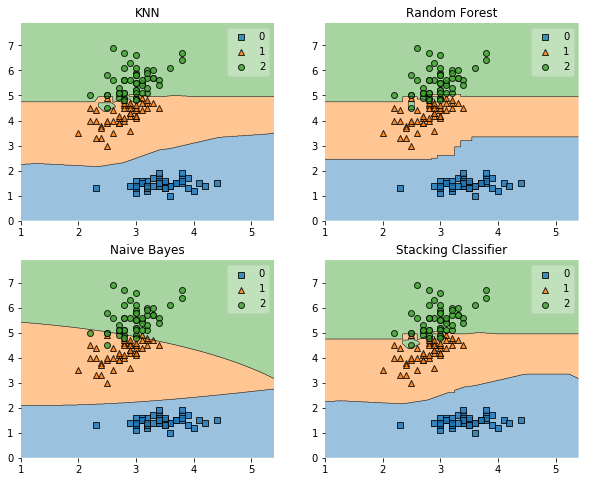

In [16]:
label = ['KNN', 'Random Forest', 'Naive Bayes', 'Stacking Classifier']
clf_list = [clf1, clf2, clf3, sclf]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2,2)
grid = itertools.product([0,1], repeat=2)

clf_cv_mean = []
clf_cv_std = []

for clf, label, grd in zip(clf_list, label,  grid):
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
    
    clf.fit(X,y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(label)
    
plt.show()


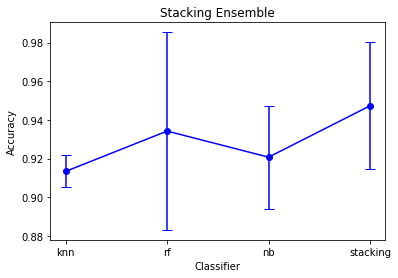

In [19]:
#plot classifier accuracy  
plt.figure()
(_, caps, _) = plt.errorbar(range(4),clf_cv_mean, yerr= clf_cv_std, c='blue', fmt='-o', capsize=5)

for cap in caps:
    cap.set_markeredgewidth(1)
    
plt.xticks(range(4), ['knn', 'rf', 'nb', 'stacking'])
plt.ylabel('Accuracy');plt.xlabel('Classifier');plt.title('Stacking Ensemble')
plt.show()

/Users/jyotirmoyroy/miniconda3/envs/dlnd/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jyotirmoyroy/miniconda3/envs/dlnd/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/jyotirmoyroy/miniconda3/envs/dlnd/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jyotirmoyroy/miniconda3/envs/dlnd/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/U

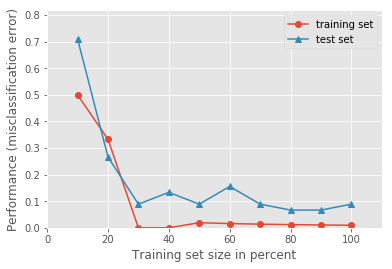

In [23]:
#plot learning curves
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.figure()

plot_learning_curves(X_train, y_train, X_test, y_test, sclf, print_model=False, style='ggplot')
plt.show()

We can see that stacking achieves higher accuracy than individual classifiers and based on learning curves, it shows no signs of overfitting.